AnyDataGuiCallbacks
===================

Introduction
------------

AnyDataGuiCallbacks provides a set of callbacks that define how a particular data type should be presented, edited, and managed within the Fiatlight GUI framework.

These callbacks are used by [AnyDataWithGui](any_data_with_gui).

Source
------

Below, is the class source, which you can also see [online](https://github.com/pthom/fiatlight/blob/refact_io/src/python/fiatlight/fiat_core/any_data_gui_callbacks.py).

In [2]:
from fiatlight.fiat_doc import look_at_code
%look_at_python_code fiatlight.fiat_core.AnyDataGuiCallbacks

class AnyDataGuiCallbacks(Generic[DataType]):
    """AnyDataGuiCallbacks: Collection of callbacks for a given type

    AnyDataGuiCallbacks
    ===================

    This class provides a set of callbacks that define how a particular data type should be
    presented, edited, and managed within the Fiatlight GUI framework.

    These callbacks are used by [AnyDataWithGui](any_data_with_gui).

    """

    #                        Presentation
    # ---------------------------------------------------------------------------------------------
    # present_str: (Mandatory if str() is not enough, optional otherwise)
    # Provide a function that returns a short string info about the data content
    # This string will be presented as a short description of the data in the GUI
    #
    # If possible, it should be short enough to fit in a single line inside a node (40 chars max).
    # If the result string is too long, or occupies more than one line, it will be truncated and followed by "..."
    # (and the rest of the string will be displayed in a tooltip)
    # For example, on complex types such as images, return something like "128x128x3 uint8"
    # If not provided, the data will be presented using str()
    present_str: Callable[[DataType], str] | None = None

    # present: (Optional)
    # a function that provides a more complex, custom GUI representation of the data. Used for detailed views.
    # It will be presented when a function param is in "expanded" mode, and can use imgui widgets on several lines.
    # If not provided, the data will be presented using present_str
    #
    # Note: Some widgets cannot be presented in a Node (e.g., a multiline text input, a child window, etc.)!
    #       You can query `fiatlight.is_rendering_in_node()` to know if you are rendering in a node.
    #       Also, when inside a Node, you may want to render a smaller version, to save space
    #       (as opposed to rendering a larger version in a detached window).
    present: Callable[[DataType], None] | None = None

    # present_collapsible:
    # Set this to False if your custom presentation is small and fits in one line
    # (i.e. it does not need to be collapsible)
    # If True, the gui presentation will either:
    #     - show present_str + an expand button
    #     - show the custom presentation + a collapse button
    present_collapsible: bool = True

    # present_node_compatible: (Optional: set to False if using input_text_multiline, combo, begin_child, etc.)
    # If True, the present function is incompatible with being presented in a node (this is due to a limitation
    # of the node editor, which cannot render scrollable widgets)
    # Note: instead of setting edit_node_compatible to False, you may query
    #       `fiatlight.is_rendering_in_node()` to know if you are rendering in a node
    #       and choose alternative widgets in this case.
    present_node_compatible: bool = True

    # ---------------------------------------------------------------------------------------------

    #                        Edition
    # ---------------------------------------------------------------------------------------------
    # edit: (Mandatory if edition is required)
    # Provide a function that presents an editable interface for the data, and returns
    #     (True, new_value) if changed
    #     (False, old_value) if not changed
    # If not provided, the data will be presented as read-only
    # Note: Some widgets cannot be presented in a Node (e.g., a multiline text input, a child window, etc.)!
    #       You can query `fiatlight.is_rendering_in_node()` to know if you are rendering in a node.
    edit: Callable[[DataType], tuple[bool, DataType]] | None = None

    # edit_collapsible:
    # Set this to False if your custom edition is small, and does not need to be collapsible (i.e. it fits one line)
    # If True, the gui edition will either:
    #     - show present_str + an expand button
    #     - show t

Architecture
------------

Below is a PlantUML diagram showing the architecture of the `fiat_core` module.
See the [architecture page](architecture) for the full architecture diagrams.

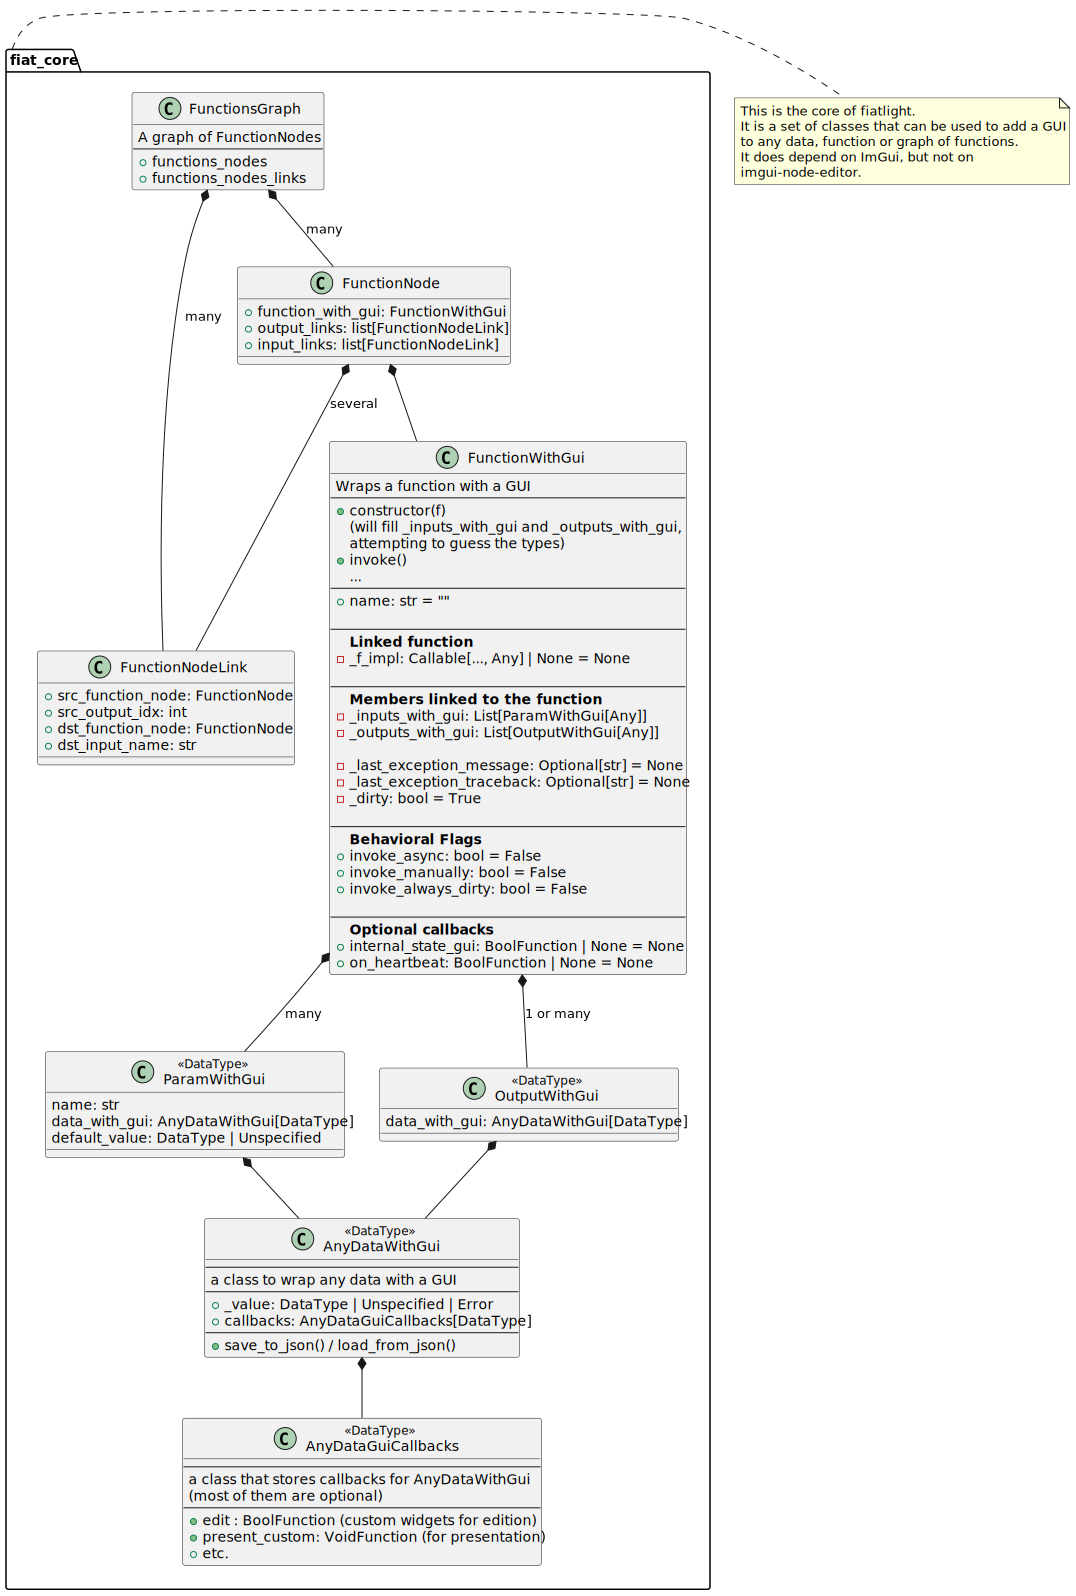

In [3]:
from fiatlight.fiat_doc import plantuml_magic
%plantuml_include class_diagrams/fiat_core.puml